In [1]:
import pandas as pd
import numpy as np

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

train=train.drop('index', axis=1)
test=test.drop('index', axis=1)

train=train.drop('FLAG_MOBIL', axis=1)
test=test.drop('FLAG_MOBIL', axis=1)

train=train.drop('child_num', axis=1)
test=test.drop('child_num', axis=1)

train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])

train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])

train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])

train.loc[train['family_size'] >= 4,'family_size']=4
test.loc[test['family_size']>=4, 'family_size']=4

In [2]:
def days_to_year(x):
    if x<0:
        return (x*(-1))/365
    return 0

def minus_to_plus(x):
    if x<0:
        return x*(-1)
    return 0

In [3]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_year)
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_year)
train['begin_month'] = train['begin_month'].apply(minus_to_plus)

test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(days_to_year)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(days_to_year)
test['begin_month'] = test['begin_month'].apply(minus_to_plus)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   income_total   26457 non-null  float64
 4   income_type    26457 non-null  object 
 5   edu_type       26457 non-null  object 
 6   family_type    26457 non-null  object 
 7   house_type     26457 non-null  object 
 8   DAYS_BIRTH     26457 non-null  float64
 9   DAYS_EMPLOYED  26457 non-null  float64
 10  work_phone     26457 non-null  int64  
 11  phone          26457 non-null  int64  
 12  email          26457 non-null  int64  
 13  family_size    26457 non-null  float64
 14  begin_month    26457 non-null  float64
 15  credit         26457 non-null  float64
dtypes: float64(6), int64(6), object(4)
memory usage: 3.2+ MB


In [5]:
train.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,12.901370,0,0,0,2.0,6.0,1.0
1,0,0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,4.219178,0,0,1,3.0,5.0,1.0
2,1,1,1,450000.0,Working,Higher education,Married,House / apartment,52.293151,12.147945,0,1,0,2.0,22.0,2.0
3,0,0,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,5.731507,0,1,0,2.0,37.0,0.0
4,0,1,1,157500.0,State servant,Higher education,Married,House / apartment,41.197260,5.767123,0,0,0,2.0,26.0,2.0


# KNN 모델링

## 원핫 인코딩

In [37]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False)

income_type_encoded = encoder.fit_transform(train[['income_type']])
income_type_encoded_df = pd.DataFrame(income_type_encoded, columns=encoder.get_feature_names_out(['income_type']))
train = pd.concat([train, income_type_encoded_df], axis=1).drop('income_type', axis=1)

income_type_encoded_test = encoder.transform(test[['income_type']])
income_type_encoded_test_df = pd.DataFrame(income_type_encoded_test, columns=encoder.get_feature_names_out(['income_type']))
test = pd.concat([test, income_type_encoded_test_df], axis=1).drop('income_type', axis=1)

encoder = OneHotEncoder(sparse_output=False)
edu_type_encoded = encoder.fit_transform(train[['edu_type']])
edu_type_encoded_df = pd.DataFrame(edu_type_encoded, columns=encoder.get_feature_names_out(['edu_type']))
train = pd.concat([train, edu_type_encoded_df], axis=1).drop('edu_type', axis=1)

edu_type_encoded_test = encoder.transform(test[['edu_type']])
edu_type_encoded_test_df = pd.DataFrame(edu_type_encoded_test, columns=encoder.get_feature_names_out(['edu_type']))
test = pd.concat([test, edu_type_encoded_test_df], axis=1).drop('edu_type', axis=1)

encoder = OneHotEncoder(sparse_output=False)
family_type_encoded = encoder.fit_transform(train[['family_type']])
family_type_encoded_df = pd.DataFrame(family_type_encoded, columns=encoder.get_feature_names_out(['family_type']))
train = pd.concat([train, family_type_encoded_df], axis=1).drop('family_type', axis=1)

family_type_encoded_test = encoder.transform(test[['family_type']])
family_type_encoded_test_df = pd.DataFrame(family_type_encoded_test, columns=encoder.get_feature_names_out(['family_type']))
test = pd.concat([test, family_type_encoded_test_df], axis=1).drop('family_type', axis=1)

encoder = OneHotEncoder(sparse_output=False)
house_type_encoded = encoder.fit_transform(train[['house_type']])
house_type_encoded_df = pd.DataFrame(house_type_encoded, columns=encoder.get_feature_names_out(['house_type']))
train = pd.concat([train, house_type_encoded_df], axis=1).drop('house_type', axis=1)

house_type_encoded_test = encoder.transform(test[['house_type']])
house_type_encoded_test_df = pd.DataFrame(house_type_encoded_test, columns=encoder.get_feature_names_out(['house_type']))
test = pd.concat([test, house_type_encoded_test_df], axis=1).drop('house_type', axis=1)

## Min-Max 스케일링

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import log_loss
# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


# KNN 모델 생성 및 훈련
# 16 = 0.640
# 10 = 0.636
# 7 = 0.627
# 6 = 0.614
# 5 = 0.610
# 4 = 0.59
# 3 = 0.606
# 2 = 0.524
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)

y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(f'Log Loss: {loss}')

정확도: 0.6405895691609977
              precision    recall  f1-score   support

         0.0       0.33      0.06      0.10       650
         1.0       0.45      0.18      0.25      1262
         2.0       0.67      0.93      0.78      3380

    accuracy                           0.64      5292
   macro avg       0.48      0.39      0.38      5292
weighted avg       0.58      0.64      0.57      5292

Log Loss: 1.4779237203902262


## 표준화 스케일링

In [20]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# KNN 모델 생성 및 훈련
# 26 = 0.648
# 20 = 0.647
# 19 = 0.646
# 16 = 0.645
# 14 = 0.640
# 8 = 0.628
# 7 = 0.631
# 6 = 0.624
# 5 = 0.623
# 4 = 0.609
# 3 = 0.613
# 2 = 0.540
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)
# 예측 및 성능 평가
y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(f'Log Loss: {loss}')
print(classification_report(y_val, y_pred))

정확도: 0.6421012849584278
Log Loss: 0.8721678385582741
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       650
         1.0       0.49      0.06      0.11      1262
         2.0       0.65      0.98      0.78      3380

    accuracy                           0.64      5292
   macro avg       0.71      0.35      0.30      5292
weighted avg       0.65      0.64      0.52      5292



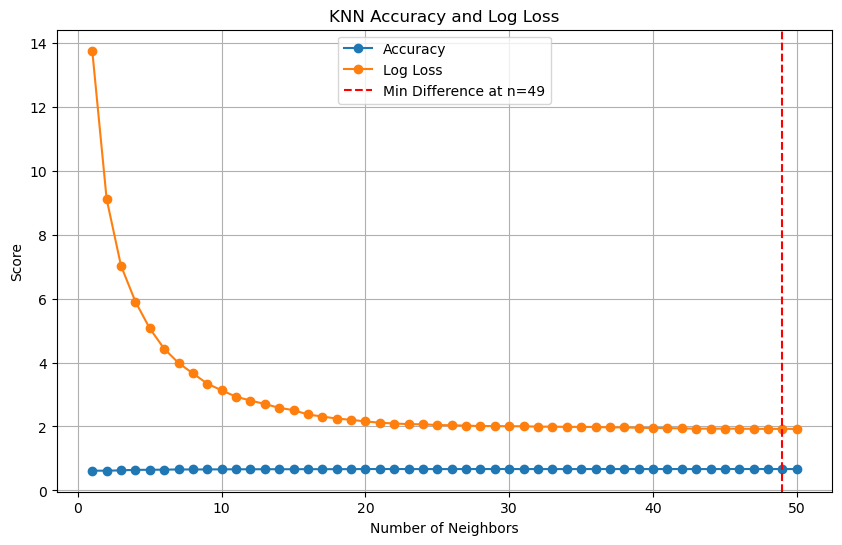

The smallest difference between Accuracy and Log Loss is at n_neighbors = 49


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# n_neighbors 값에 따른 정확도와 Log Loss 계산
neighbors = list(range(1, 51))  # 1부터 50까지 검토
accuracy_scores = []
log_losses = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_probs = knn.predict_proba(X_val)
    y_pred = knn.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    log_losses.append(log_loss(y_val, y_pred_probs))

# 정확도와 Log Loss 차이가 최소인 점 찾기
differences = np.abs(np.array(accuracy_scores) - np.array(log_losses))
min_diff_index = np.argmin(differences)
min_diff_n_neighbors = neighbors[min_diff_index]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, label='Accuracy', marker='o')
plt.plot(neighbors, log_losses, label='Log Loss', marker='o')
plt.axvline(x=min_diff_n_neighbors, color='red', linestyle='--', label=f'Min Difference at n={min_diff_n_neighbors}')
plt.title('KNN Accuracy and Log Loss')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"The smallest difference between Accuracy and Log Loss is at n_neighbors = {min_diff_n_neighbors}")


## 원핫 Robust 스케일링

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# KNN 모델 생성 및 훈련
# 20 = 0.644
# 15 = 0.639
# 12 = 0.636
# 7 = 0.629
# 5 = 0.625
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)
# 예측 및 성능 평가
y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(f'Log Loss: {loss}')
print(classification_report(y_val, y_pred))

정확도: 0.6447467876039304
Log Loss: 1.2056088412434882
              precision    recall  f1-score   support

         0.0       0.29      0.04      0.07       650
         1.0       0.48      0.15      0.23      1262
         2.0       0.66      0.95      0.78      3380

    accuracy                           0.64      5292
   macro avg       0.48      0.38      0.36      5292
weighted avg       0.57      0.64      0.56      5292



## KNN모델에 가중치 파라미터 추가

In [17]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# KNN 모델 생성 및 훈련
# 26 = 0.648
# 20 = 0.647
# 19 = 0.646
# 16 = 0.645
# 14 = 0.640
# 8 = 0.628
# 7 = 0.631
# 6 = 0.624
# 5 = 0.623
# 4 = 0.609
# 3 = 0.613
# 2 = 0.540
knn = KNeighborsClassifier(n_neighbors=49,weights='distance', metric='euclidean')
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)
# 예측 및 성능 평가
y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(f'Log Loss: {loss}')
print(classification_report(y_val, y_pred))

정확도: 0.6683673469387755
Log Loss: 1.9253028029190273
              precision    recall  f1-score   support

         0.0       0.45      0.14      0.21       650
         1.0       0.60      0.22      0.33      1262
         2.0       0.68      0.94      0.79      3380

    accuracy                           0.67      5292
   macro avg       0.58      0.43      0.44      5292
weighted avg       0.64      0.67      0.61      5292



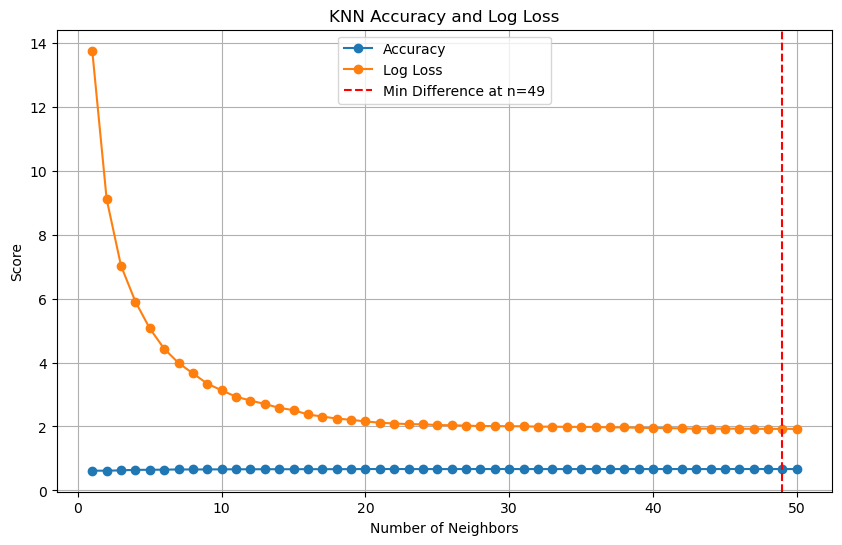

The smallest difference between Accuracy and Log Loss is at n_neighbors = 49


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# n_neighbors 값에 따른 정확도와 Log Loss 계산
neighbors = list(range(1, 51))  # 1부터 50까지 검토
accuracy_scores = []
log_losses = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance', metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred_probs = knn.predict_proba(X_val)
    y_pred = knn.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    log_losses.append(log_loss(y_val, y_pred_probs))

# 정확도와 Log Loss 차이가 최소인 점 찾기
differences = np.abs(np.array(accuracy_scores) - np.array(log_losses))
min_diff_index = np.argmin(differences)
min_diff_n_neighbors = neighbors[min_diff_index]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, label='Accuracy', marker='o')
plt.plot(neighbors, log_losses, label='Log Loss', marker='o')
plt.axvline(x=min_diff_n_neighbors, color='red', linestyle='--', label=f'Min Difference at n={min_diff_n_neighbors}')
plt.title('KNN Accuracy and Log Loss')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"The smallest difference between Accuracy and Log Loss is at n_neighbors = {min_diff_n_neighbors}")


---

## 라벨 인코딩

In [50]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['income_type'] = label_encoder.fit_transform(train['income_type'])
test['income_type'] = label_encoder.transform(test['income_type'])

#교육 수준 순서 고려
edu_type_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
train['edu_type'] = train['edu_type'].map(edu_type_mapping)
test['edu_type'] = test['edu_type'].map(edu_type_mapping)

train['family_type'] = label_encoder.fit_transform(train['family_type'])
test['family_type'] = label_encoder.transform(test['family_type'])

train['house_type'] = label_encoder.fit_transform(train['house_type'])
test['house_type'] = label_encoder.transform(test['house_type'])

## 라벨 min_max 스케일링

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


# KNN 모델 생성 및 훈련
# 15 = 0.651
# 10 = 0.638
# 7 = 0.627
# 6 = 0.617
# 5 = 0.613
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)
# 예측 및 성능 평가
y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(f'Log Loss: {loss}')
print(classification_report(y_val, y_pred))

정확도: 0.6479591836734694
Log Loss: 0.9327312366580395
              precision    recall  f1-score   support

         0.0       0.24      0.01      0.01       650
         1.0       0.53      0.10      0.17      1262
         2.0       0.66      0.97      0.78      3380

    accuracy                           0.65      5292
   macro avg       0.48      0.36      0.32      5292
weighted avg       0.58      0.65      0.54      5292



## 라벨 표준화 스케일링

In [52]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# KNN 모델 생성 및 훈련
# 28 = 0.650
# 15 = 0.647
# 9 = 0.639
# 7 = 0.632
# 5 = 0.621
# 3 = 0.615
knn = KNeighborsClassifier(n_neighbors=68)
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)
# 예측 및 성능 평가
y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(f'Log Loss: {loss}')
print(classification_report(y_val, y_pred))

정확도: 0.6464474678760394
Log Loss: 0.865110458918583
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       650
         1.0       0.60      0.05      0.09      1262
         2.0       0.65      0.99      0.78      3380

    accuracy                           0.65      5292
   macro avg       0.42      0.35      0.29      5292
weighted avg       0.56      0.65      0.52      5292



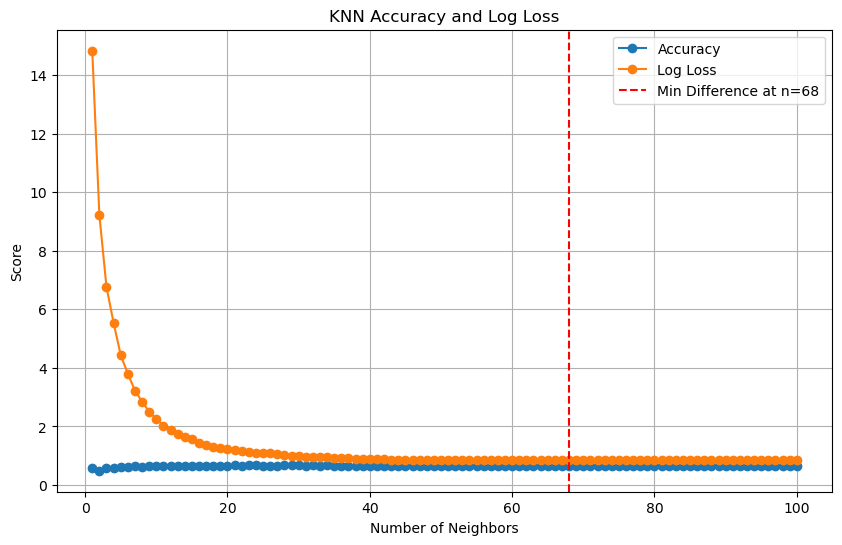

The smallest difference between Accuracy and Log Loss is at n_neighbors = 68


In [51]:
import matplotlib.pyplot as plt
import numpy as np

# n_neighbors 값에 따른 정확도와 Log Loss 계산
neighbors = list(range(1, 101))
accuracy_scores = []
log_losses = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_probs = knn.predict_proba(X_val)
    y_pred = knn.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    log_losses.append(log_loss(y_val, y_pred_probs))

# 정확도와 Log Loss 차이가 최소인 점 찾기
differences = np.abs(np.array(accuracy_scores) - np.array(log_losses))
min_diff_index = np.argmin(differences)
min_diff_n_neighbors = neighbors[min_diff_index]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, label='Accuracy', marker='o')
plt.plot(neighbors, log_losses, label='Log Loss', marker='o')
plt.axvline(x=min_diff_n_neighbors, color='red', linestyle='--', label=f'Min Difference at n={min_diff_n_neighbors}')
plt.title('KNN Accuracy and Log Loss')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"The smallest difference between Accuracy and Log Loss is at n_neighbors = {min_diff_n_neighbors}")


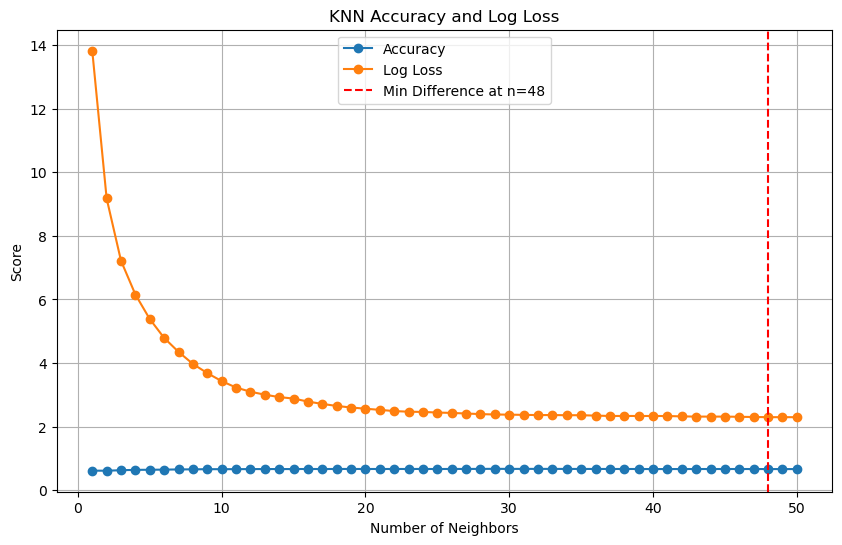

The smallest difference between Accuracy and Log Loss is at n_neighbors = 48


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# n_neighbors 값에 따른 정확도와 Log Loss 계산
neighbors = list(range(1, 51))  # 1부터 50까지 검토
accuracy_scores = []
log_losses = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance', metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred_probs = knn.predict_proba(X_val)
    y_pred = knn.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    log_losses.append(log_loss(y_val, y_pred_probs))

# 정확도와 Log Loss 차이가 최소인 점 찾기
differences = np.abs(np.array(accuracy_scores) - np.array(log_losses))
min_diff_index = np.argmin(differences)
min_diff_n_neighbors = neighbors[min_diff_index]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, label='Accuracy', marker='o')
plt.plot(neighbors, log_losses, label='Log Loss', marker='o')
plt.axvline(x=min_diff_n_neighbors, color='red', linestyle='--', label=f'Min Difference at n={min_diff_n_neighbors}')
plt.title('KNN Accuracy and Log Loss')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"The smallest difference between Accuracy and Log Loss is at n_neighbors = {min_diff_n_neighbors}")


In [31]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# KNN 모델 생성 및 훈련
# 28 = 0.650
# 15 = 0.647
# 9 = 0.639
# 7 = 0.632
# 5 = 0.621
# 3 = 0.615
knn = KNeighborsClassifier(n_neighbors=48, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)
# 예측 및 성능 평가
y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(f'Log Loss: {loss}')
print(classification_report(y_val, y_pred))

정확도: 0.6662887377173091
Log Loss: 2.2977392372514225
              precision    recall  f1-score   support

         0.0       0.44      0.14      0.21       650
         1.0       0.59      0.21      0.31      1262
         2.0       0.68      0.94      0.79      3380

    accuracy                           0.67      5292
   macro avg       0.57      0.43      0.44      5292
weighted avg       0.63      0.67      0.60      5292



## 라벨 Robust 스케일링

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# KNN 모델 생성 및 훈련
# 28 = 0.6439
# 20 = 0.641
# 15 = 0.638
# 9 = 0.636
# 7 = 0.632
# 5 = 0.622
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)
# 예측 및 성능 평가
y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(f'Log Loss: {loss}')
print(classification_report(y_val, y_pred))

정확도: 0.6432350718065004
Log Loss: 0.9590583089967368
              precision    recall  f1-score   support

         0.0       0.21      0.01      0.01       650
         1.0       0.48      0.11      0.18      1262
         2.0       0.65      0.97      0.78      3380

    accuracy                           0.64      5292
   macro avg       0.45      0.36      0.32      5292
weighted avg       0.56      0.64      0.54      5292



## 원핫 인코딩
> #### 표준화 스케일링
>> **26 = 0.648**  
20 = 0.647  
19 = 0.646  
16 = 0.645  
14 = 0.640  
8 = 0.628  
7 = 0.631  
6 = 0.624  
5 = 0.623  
4 = 0.609  
3 = 0.613  
2 = 0.540

> #### Min-Max 스케일링
>>**16 = 0.640**  
10 = 0.636  
7 = 0.627  
6 = 0.614  
5 = 0.610  
4 = 0.59   
3 = 0.606  
2 = 0.524  

> #### Robust 스케일링
>>**20 = 0.644**  
15 = 0.639  
12 = 0.636  
7 = 0.629  
5 = 0.625  

## 라벨 인코딩
> #### 표준화 스케일링
>>**28 = 0.650**  
15 = 0.647  
9 = 0.639  
7 = 0.632  
5 = 0.621  
3 = 0.615  

> #### Min-Max 스케일링
>>**15 = 0.651**  
10 = 0.638  
7 = 0.627  
6 = 0.617  
5 = 0.613  

> #### Robust 스케일링
>>**28 = 0.6439**  
20 = 0.641  
15 = 0.638  
9 = 0.636  
7 = 0.632  
5 = 0.622  

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


X = train.drop('credit', axis=1)
y = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# 결과 확인
print("Original training dataset shape:", y_train.value_counts())
print("Resampled training dataset shape:", y_train_rus.value_counts())


Original training dataset shape: 2.0    13588
1.0     5005
0.0     2572
Name: credit, dtype: int64
Resampled training dataset shape: 0.0    2572
1.0    2572
2.0    2572
Name: credit, dtype: int64


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import log_loss
# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train.drop('credit', axis=1))
y_train = train['credit']

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


# KNN 모델 생성 및 훈련

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

y_pred_probs = knn.predict_proba(X_val)

y_pred = knn.predict(X_val)

loss = log_loss(y_val, y_pred_probs)

print("정확도:",accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(f'Log Loss: {loss}')

정확도: 0.6405895691609977
              precision    recall  f1-score   support

         0.0       0.33      0.06      0.10       650
         1.0       0.45      0.18      0.25      1262
         2.0       0.67      0.93      0.78      3380

    accuracy                           0.64      5292
   macro avg       0.48      0.39      0.38      5292
weighted avg       0.58      0.64      0.57      5292

Log Loss: 1.4779237203902262


# 과소 샘플링 후 진행

In [32]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

X = train.drop('credit', axis=1)  # 'credit' 열을 제외한 나머지 데이터를 특성으로 사용
y = train['credit']  # 'credit' 열을 레이블로 사용

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 과소 샘플링
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_under)
X_val_scaled = scaler.transform(X_val)

# KNN 모델 생성 및 훈련
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train_scaled, y_train_under)

# 예측 및 성능 평가
y_pred = knn.predict(X_val_scaled)
y_pred_probs = knn.predict_proba(X_val_scaled)
print("정확도:", accuracy_score(y_val, y_pred))
print("Log Loss:", log_loss(y_val, y_pred_probs))
print(classification_report(y_val, y_pred))


정확도: 0.3938019652305367
Log Loss: 1.0825909358941908
              precision    recall  f1-score   support

         0.0       0.15      0.42      0.22       650
         1.0       0.32      0.40      0.36      1262
         2.0       0.70      0.39      0.50      3380

    accuracy                           0.39      5292
   macro avg       0.39      0.40      0.36      5292
weighted avg       0.54      0.39      0.43      5292



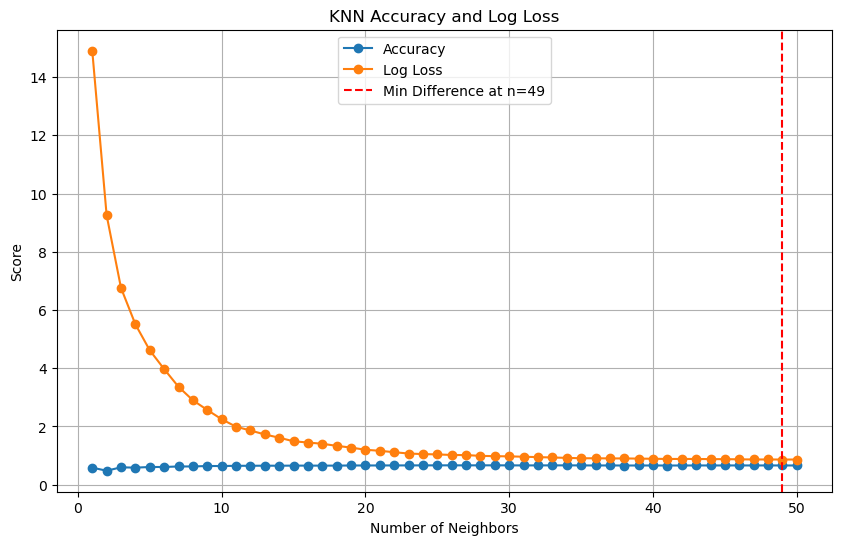

The smallest difference between Accuracy and Log Loss is at n_neighbors = 49


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# n_neighbors 값에 따른 정확도와 Log Loss 계산
neighbors = list(range(1, 51))  # 1부터 50까지 검토
accuracy_scores = []
log_losses = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_probs = knn.predict_proba(X_val)
    y_pred = knn.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    log_losses.append(log_loss(y_val, y_pred_probs))

# 정확도와 Log Loss 차이가 최소인 점 찾기
differences = np.abs(np.array(accuracy_scores) - np.array(log_losses))
min_diff_index = np.argmin(differences)
min_diff_n_neighbors = neighbors[min_diff_index]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, label='Accuracy', marker='o')
plt.plot(neighbors, log_losses, label='Log Loss', marker='o')
plt.axvline(x=min_diff_n_neighbors, color='red', linestyle='--', label=f'Min Difference at n={min_diff_n_neighbors}')
plt.title('KNN Accuracy and Log Loss')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"The smallest difference between Accuracy and Log Loss is at n_neighbors = {min_diff_n_neighbors}")


In [53]:
pip install shap


     ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
     ------------------------------------- 455.5/455.5 kB 14.4 MB/s eta 0:00:00


In [58]:
pip install xgboost


     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.5/99.8 MB 15.5 MB/s eta 0:00:07
     ---------------------------------------- 0.9/99.8 MB 13.5 MB/s eta 0:00:08
     ---------------------------------------- 1.0/99.8 MB 13.3 MB/s eta 0:00:08
     ---------------------------------------- 1.0/99.8 MB 13.3 MB/s eta 0:00:08
     ---------------------------------------- 1.0/99.8 MB 13.3 MB/s eta 0:00:08
     ---------------------------------------- 1.0/99.8 MB 13.3 MB/s eta 0:00:08
     ---------------------------------------- 1.0/99.8 MB 13.3 MB/s eta 0:00:08
      --------------------------------------- 1.4/99.8 MB 3.9 MB/s eta 0:00:26
      --------------------------------------- 1.9/99.8 MB 4.8 MB/s eta 0:00:21
      --------------------------------------- 2.5/99.8 MB 5.6 MB/s eta 0:00:18
     - -------------------------------------- 3.0/99.8 MB 6.2 MB/s eta 0:00:16
     - -------------------------------------- 3.5/99

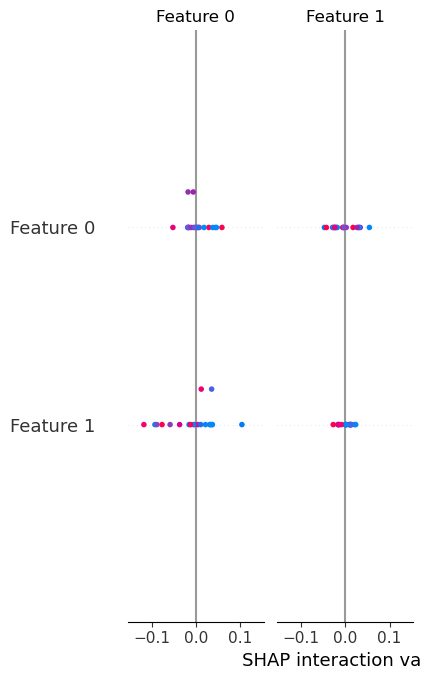

In [60]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 데이터 로드 (예시 데이터)
# 이 부분은 실제 데이터셋으로 교체해야 합니다.
X, y = np.random.rand(100, 10), np.random.randint(2, size=100)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# SHAP 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # X_test는 Numpy 배열이거나 DataFrame이어야 합니다.

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_test, plot_type="bar")  # X_test 데이터 형식을 명시


C:\Users\User\AppData\Local\Temp\ipykernel_16424\536672193.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='edu_type', y='income_total', data=data_for_visualization, ci=None)


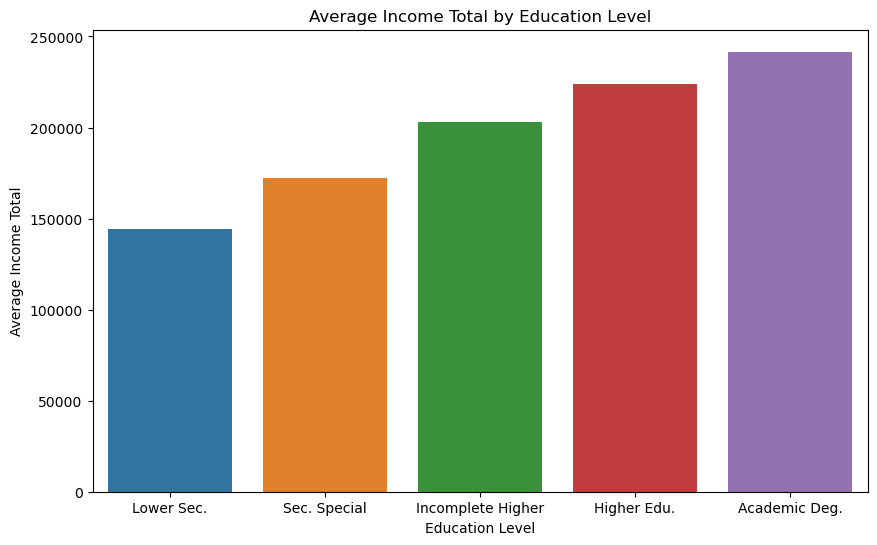

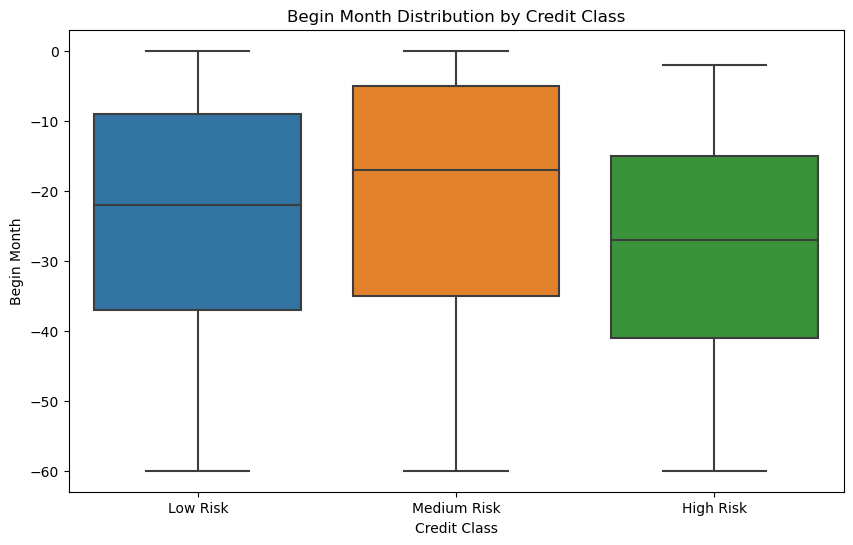

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
train = pd.read_csv('train.csv')

# edu_type을 순서형으로 인코딩
edu_type_mapping = {
    'Lower secondary': 0,  # Lowest education level
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4  # Highest education level
}
train['edu_type'] = train['edu_type'].map(edu_type_mapping)

# 필요한 변수만 추출
data_for_visualization = train[['edu_type', 'income_total', 'begin_month', 'credit']]

# edu_type과 income_total 관계 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='edu_type', y='income_total', data=data_for_visualization, ci=None)
plt.title('Average Income Total by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income Total')
plt.xticks(ticks=range(5), labels=['Lower Sec.', 'Sec. Special', 'Incomplete Higher', 'Higher Edu.', 'Academic Deg.'])
plt.show()

# begin_month와 credit 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit', y='begin_month', data=data_for_visualization)
plt.title('Begin Month Distribution by Credit Class')
plt.xlabel('Credit Class')
plt.ylabel('Begin Month')
plt.xticks(ticks=range(3), labels=['Low Risk', 'Medium Risk', 'High Risk'])
plt.show()
